$\newcommand{\xv}{\mathbf{x}}
 \newcommand{\wv}{\mathbf{w}}
 \newcommand{\vv}{\mathbf{v}}
 \newcommand{\yv}{\mathbf{y}}
 \newcommand{\zv}{\mathbf{z}}
 \newcommand{\av}{\mathbf{a}}
 \newcommand{\Chi}{\mathcal{X}}
 \newcommand{\R}{\rm I\!R}
 \newcommand{\sign}{\text{sign}}
 \newcommand{\Tm}{\mathbf{T}}
 \newcommand{\Xm}{\mathbf{X}}
 \newcommand{\Xlm}{\mathbf{X1}}
 \newcommand{\Wm}{\mathbf{W}}
 \newcommand{\Vm}{\mathbf{V}}
 \newcommand{\Ym}{\mathbf{Y}}
 \newcommand{\Zm}{\mathbf{Z}}
 \newcommand{\Gm}{\mathbf{G}}
 \newcommand{\Zlm}{\mathbf{Z1}}
 \newcommand{\I}{\mathbf{I}}
 \newcommand{\muv}{\boldsymbol\mu}
 \newcommand{\Sigmav}{\boldsymbol\Sigma}
 \newcommand{\Phiv}{\boldsymbol\Phi}
$

# Nonlinear Logistic Regression 



Previously, we learned the linear logistic regression that uses the softmax layer for classification along with a linear model. 

$$
g_k(\xv) = P(T=k \mid \xv) = \frac{e^{\kappa_k}}{\sum_{c=1}^K e^{\kappa_c}}
$$

By using this softmax function, we were able to generate probablistic outputs for all classes. To handle multi-label classes, we use the indicator target labels for training to update the weights for the linear model. 
Following the derivation, we have achieved the following update rule: 



$$
\wv_j \leftarrow \wv_j + \alpha \sum_{n=1}^{N} \Big( t_{n,j} - g_j(\xv_n)\Big) \xv_n.
$$

To update the weights with batch samples, we can convert this update rule in matrix form as follows:

$$
\wv \leftarrow \wv + \alpha \Xm^\top \Big(  \Tm - g(\Xm)\Big).
$$

Remember we start from the error function below for the derivation bvefore:

$$
E(\wv) = - \ln P(\Tm \mid \wv) =  - \sum_{n=1}^{N} \sum_{k=1}^{K} t_{n,k} \ln y_{n,k}.
$$

<img src="http://webpages.uncc.edu/mlee173/teach/itcs4156online/images/class/linearlogreg.png" width=450 />


# Nonlinear Extension with Neural Networks

Now, we extend this to two layer neural networks. Similar to the derivation of neural network for regression, we can derive the gradient by switching the squuared error with the negative log likelihood function above. 

<img src="http://webpages.uncc.edu/mlee173/teach/itcs4156online/images/class/nonlinearlogreg.png" width=600 />



From the error function $E(\wv)$, we can derive the gradient to update the weights for each layer. 


$$
\begin{align}
v_{dg} &\leftarrow v_{dg} - \alpha_h \frac{\partial{E(\Wm, \Vm)}} {\partial{v_{dg}}} \\ 
\\ 
w_{gk} &\leftarrow w_{gk} - \alpha_o \frac{\partial{E(\Wm, \Vm)}} {\partial{w_{gk}}},
\end{align}
$$

where $\alpha_h$ and $\alpha_o$ are the learning rate for hidden and output layer respectively. Here, we denote the output of the neural network as $\kappa$. 

$$
\begin{align}
\frac{\partial{E}}{\partial{w_{gk}}} &= -\frac{\partial{\Big( \sum_{n=1}^{N} \sum_{l=1}^{K} (t_{nl} \ln g_{nl}(\xv_n))} \Big)}{\partial{w_{gk}}} \\
   \\
    &= -\sum_{n=1}^{N} \sum_{l=1}^{K} t_{n,l} \frac{1}{g_{n,k}(\xv_n)} \frac{\partial g_{n,k}(\xv_n)}{\partial  {w_{gk}}}\\
    &= -\sum_{n=1}^{N} \sum_{l=1}^{K} t_{n,l} \frac{1}{g_{n,k}(\xv_n)} \frac{\partial g_{n,k}(\xv_n)}{\partial  \kappa_{nk}} \frac{\partial  \kappa_{nk} }{\partial  {w_{gk}}}\\
    &= -\sum_{n=1}^{N} \sum_{l=1}^{K} t_{n,l} \frac{1}{g_{n,k}(\xv_n)} g_{nk}(\xv_n) (I_{lk} - g_{nk}(\xv_n))  \frac{\partial  \kappa_{nk} }{\partial  {w_{gk}}}\\
    &= -\sum_{n=1}^{N} \sum_{l=1}^{K} t_{n,l} (I_{lk} - g_{nk}(\xv_n))  \frac{\partial  \sum_{g=0}^{G} z1_{ng} w_{gk}  }{\partial  {w_{gk}}}\\
    &= -\sum_{n=1}^{N} \sum_{l=1}^{K} t_{n,l} (I_{lk} - g_{nk}(\xv_n)) z1_{ng}\\
    &= -\sum_{n=1}^{N} \Big(\sum_{l=1}^{K}  t_{n,l} (I_{lk} - g_{nk}(\xv_n)) \Big) z1_{ng}\\
    &= -\sum_{n=1}^{N} \Big( \sum_{l=1}^{K} t_{n,l} I_{lk} - g_{nk}(\xv_n) \sum_{l=1}^{K} t_{n,l}  \Big) z1_{ng}\\
    &= -\sum_{n=1}^{N} \Big( t_{n,k} - g_{nk}(\xv_n) \Big) z1_{ng}.
\end{align}
$$

Coverting this gradient in matrix form and reflecting it on our weight update,

$$
\Wm \leftarrow \Wm + \alpha_o \Zlm^\top \Big(  \Tm - g(\Xm)\Big).
$$

Now let us update the weight $\vv$ for the hidden layer. 
For the hidden layer, we repeat this: 

$$
\begin{align}
\frac{\partial{E}}{\partial{v_{dg}}} &= \frac{\partial{\Big( \sum_{n=1}^{N} \sum_{k=1}^{K} (t_{nk} \ln g_{nk}(\xv_n))}  \Big)}{\partial{v_{dg}}} \\
    &= -\sum_{n=1}^{N} \sum_{k=1}^{K} t_{n,k} \frac{1}{g_{n,k}(\xv_n)} \frac{\partial g_{n,k}(\xv_n)}{\partial  {v_{dg}}}\\
    &= -\sum_{n=1}^{N} \sum_{k=1}^{K} t_{n,k} \frac{1}{g_{n,k}(\xv_n)} \frac{\partial g_{n,k}(\xv_n)} {\partial \kappa_{nk}} \frac{\partial \kappa_{nk}} {\partial  {v_{dg}}}\\
    &= -\sum_{n=1}^{N} \sum_{k=1}^{K} t_{n,k} \frac{1}{g_{n,k}(\xv_n)} \frac{\partial g_{n,k}(\xv_n)} {\partial \kappa_{nk}} \sum_{g=0}^G w_{gk} \frac{\partial{h(a_{ng})}}{\partial{a_{ng}}} \frac{\partial{a_{ng}}}{\partial{v_{dg}}}\\
    &= -\sum_{n=1}^{N} \sum_{k=1}^{K} t_{n,k} (I_{kk} - g_{nk}(\xv_n)) \sum_{g=0}^G w_{gl} \frac{\partial{h(a_{ng})}}{\partial{a_{ng}}} \frac{\partial{a_{ng}}}{\partial{v_{dg}}}\\
    &= -\sum_{n=1}^{N} \sum_{k=1}^{K} t_{n,k} (I_{kk} - g_{nk}(\xv_n)) \sum_{g=0}^G w_{gk} \frac{\partial{h(a_{ng})}}{\partial{a_{ng}}} x1_{nd}\\
    &= -\sum_{n=1}^{N} \sum_{k=1}^{K} t_{n,k} (I_{kk} - g_{nk}(\xv_n)) \sum_{g=0}^G w_{gk} \frac{\partial{h(a_{ng})}}{\partial{a_{ng}}} x1_{nd}\\
    &= -\sum_{n=1}^{N} \sum_{k=1}^{K} t_{n,k} (I_{kk} - g_{nk}(\xv_n)) \sum_{g=0}^G w_{gk} (1 - z_{ng}^2) x1_{nd}.
\end{align}
$$

Again, coverting in matrix form for the hidden weight update,


$$
\Vm \leftarrow \Vm + \alpha_h \Xlm^\top \Big( (\Tm - g(\Xm)) \Wm^\top \odot (1 - \Zm^2) \Big).
$$

Here, $\odot$ denotes the element-wise multiplication. 

## Summary (Regression vs Classification)


<table>
<tr>
<th></th>
<th width=45%> Regression </th>
<th width=45%> Classification </th>
</tr>
<tr>
<td>
Forward Pass 
</td>
<td>
$$
\begin{align}
\Zm &= h(\Xlm \cdot \Vm) \\
\\
\Ym & = \Zlm \cdot \Wm 
\end{align}
$$
</td>
<td>
$$
\begin{align}
\Zm &= h(\Xlm \cdot \Vm) \\
\\
\Ym & = \Zlm \cdot \Wm \\
\Gm & = softmax(\Ym)
\end{align}
$$
</td>
</tr>
<tr>
<td>
 Backward Pass 
</td>
<td>
$$
\begin{align}
\Vm &\leftarrow \Vm + \alpha_h \frac{1}{N} \frac{1}{K} \Xlm^\top \Big( (\Tm - \Ym) \Wm^\top \odot (1 - \Zm^2) \Big) \\
\Wm &\leftarrow \Wm + \alpha_o \frac{1}{N} \frac{1}{K} \Zlm^\top \Big( \Tm - \Ym \Big) 
\end{align}
$$
</td>
<td>
$$
\begin{align}
\Vm &\leftarrow \Vm + \alpha_h \Xlm^\top \Big( (\Tm - \Gm) \Wm^\top \odot (1 - \Zm^2) \Big)\\
\Wm &\leftarrow \Wm + \alpha_o \Zlm^\top \Big(  \Tm - \Gm\Big) 
\end{align}
$$
</td>
</tr>
<tr>
<td></td>
<td></td>
<td>
Note: Here $\Tm$ is a matrix with indicator variable outputs, <br/>
and $\Gm$ is the output matrix after the softmax layer.</td>
</tr>
</table> 

# Practice

Now, inherit the previous NeuralNetwork class to implement neural network classification. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import nn 

Let us repeat the previous classification example with nonlinear classification.

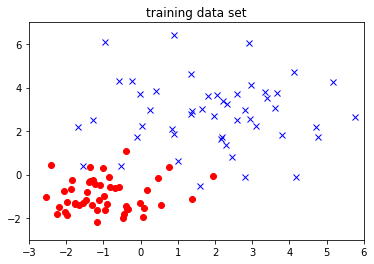

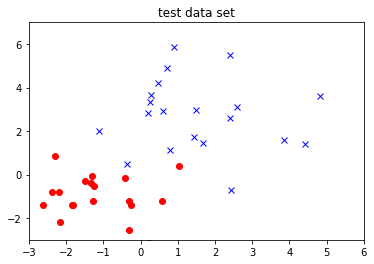

In [2]:
# Data for testing
N1 = 50
N2 = 50
N = N1 + N2
D = 2
K = 2

mu1 = [-1, -1]
cov1 = np.eye(2)

mu2 = [2,3]
cov2 = np.eye(2) * 3

#
#  Train Data
#
C1 = np.random.multivariate_normal(mu1, cov1, N1)
C2 = np.random.multivariate_normal(mu2, cov2, N2)

plt.plot(C1[:, 0], C1[:, 1], 'or')
plt.plot(C2[:, 0], C2[:, 1], 'xb')

plt.xlim([-3, 6])
plt.ylim([-3, 7])
plt.title("training data set")

Xtrain = np.vstack((C1, C2))
Ttrain = np.zeros((N, 1))
Ttrain[50:, :] = 1  # labels are zero or one

means, stds = np.mean(Xtrain, 0), np.std(Xtrain, 0)
# normalize inputs
Xtrains = (Xtrain - means) / stds

#
#  Test Data
#
Ct1 = np.random.multivariate_normal(mu1, cov1, 20)
Ct2 = np.random.multivariate_normal(mu2, cov2, 20)

Xtest = np.vstack((Ct1, Ct2))
Ttest = np.zeros((40, 1))
Ttest[20:, :] = 1

# normalize inputs
Xtests = (Xtrain - means) / stds


plt.figure()
plt.plot(Ct1[:, 0], Ct1[:, 1], 'or')
plt.plot(Ct2[:, 0], Ct2[:, 1], 'xb')

plt.xlim([-3, 6])
plt.ylim([-3, 7])
plt.title("test data set")


In [10]:
# Apply Nonlinear Logistic Regression
from imp import reload
reload(nn)
#import warnings 
#warnings.filterwarnings('ignore')

clsf = nn.NeuralNetLogReg([2, 4, 2])
clsf.train(Xtrain, Ttrain)
classes, Y = clsf.use(Xtest)

In [11]:
classes

array([ 0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,
        0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  0.])

In [12]:
Y

array([[  1.00000000e+00,   3.62429239e-24],
       [  1.00000000e+00,   4.49791656e-10],
       [  9.99999998e-01,   2.08859210e-09],
       [  1.00000000e+00,   3.62429232e-24],
       [  2.99307336e-01,   7.00692664e-01],
       [  1.00000000e+00,   3.62429229e-24],
       [  1.00000000e+00,   3.62429243e-24],
       [  1.00000000e+00,   3.62926450e-24],
       [  1.00000000e+00,   6.36987730e-24],
       [  1.00000000e+00,   3.62429240e-24],
       [  5.99996498e-01,   4.00003502e-01],
       [  1.00000000e+00,   3.62429229e-24],
       [  1.00000000e+00,   4.48284191e-24],
       [  1.00000000e+00,   3.64360621e-24],
       [  1.00000000e+00,   3.95678934e-24],
       [  1.00000000e+00,   3.67347448e-24],
       [  1.00000000e+00,   3.62429229e-24],
       [  1.00000000e+00,   3.62429233e-24],
       [  1.00000000e+00,   5.59588219e-18],
       [  1.00000000e+00,   3.62429229e-24],
       [  1.71288265e-23,   1.00000000e+00],
       [  2.19935378e-14,   1.00000000e+00],
       [  

Accuracy:  52.5 %


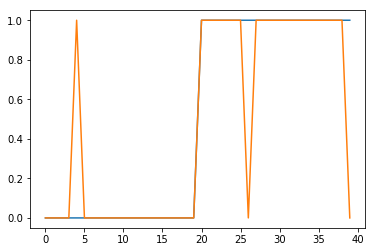

In [17]:
# retrieve labels and plot

plt.plot(Ttest)
plt.plot(classes)

print("Accuracy: ", 100 - np.mean(np.abs(Tl - Yl)) * 100, "%")

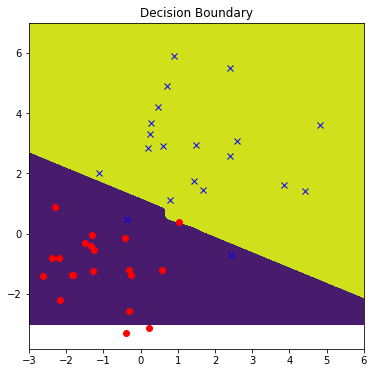

In [18]:
# show me the boundary

x = np.linspace(-3, 6, 1000)
y = np.linspace(-3, 7, 1000)

xs, ys = np.meshgrid(x, y)

X = np.vstack((xs.flat, ys.flat)).T
classes, _ = clsf.use(X)
zs = classes.reshape(xs.shape)

plt.figure(figsize=(6,6))
plt.contourf(xs, ys, zs.reshape(xs.shape))
plt.title("Decision Boundary")

plt.plot(Ct1[:, 0], Ct1[:, 1], 'or')
plt.plot(Ct2[:, 0], Ct2[:, 1], 'xb')


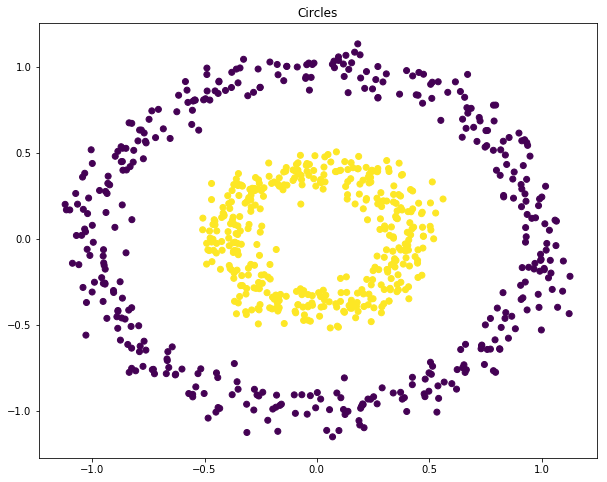

In [31]:
from sklearn.datasets import make_circles

X, T = make_circles(n_samples=800, noise=0.07, factor=0.4)

plt.figure(figsize=(10, 8))
plt.scatter(X[:, 0], X[:, 1], marker='o', c=T)
plt.title("Circles")


In [69]:
clsf = nn.NeuralNetLogReg([2, 1, 2])
clsf.train(X, T)

# checking the training error only
classes, Y = clsf.use(X)

Accuracy:  100.0 %


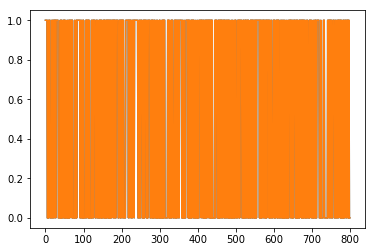

In [62]:
# retrieve labels and plot

plt.plot(T)
plt.plot(classes)

print("Accuracy: ", 100 - np.mean(np.abs(T - classes)) * 100, "%")

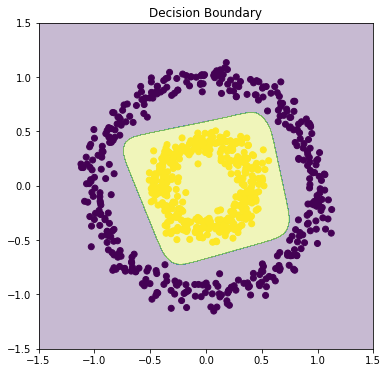

In [63]:
# show me the boundary

x = np.linspace(-1.5, 1.5, 1000)
y = np.linspace(-1.5, 1.5, 1000)

xs, ys = np.meshgrid(x, y)

Xt = np.vstack((xs.flat, ys.flat)).T
classes, _ = clsf.use(Xt)
zs = classes.reshape(xs.shape)

plt.figure(figsize=(6,6))
plt.contourf(xs, ys, zs.reshape(xs.shape), alpha=0.3)
plt.title("Decision Boundary")

plt.scatter(X[:, 0], X[:, 1], marker='o', c=T+3)


In [65]:
from sklearn.datasets import load_iris

data = load_iris()

In [67]:
data.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

In [68]:
data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [76]:
data.data.shape

(150, 4)

In [123]:
clsf = nn.NeuralNetLogReg([4, 1, 3])
clsf.train(data.data, data.target)

# checking the training error only
classes, Y = clsf.use(data.data)

Accuracy:  98.6666666667 %


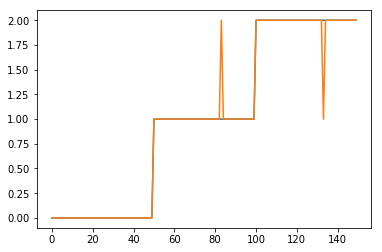

In [124]:
# retrieve labels and plot

plt.plot(data.target)
plt.plot(classes)

print("Accuracy: ", 100 - np.mean(np.abs(data.target - classes)) * 100, "%")

In [125]:
Y

array([[  9.99991385e-01,   8.61541898e-06,   2.16892851e-27],
       [  9.99978241e-01,   2.17593859e-05,   1.73875252e-26],
       [  9.99986146e-01,   1.38544096e-05,   6.30606216e-27],
       [  9.99971064e-01,   2.89362302e-05,   3.29887992e-26],
       [  9.99992127e-01,   7.87333680e-06,   1.77158220e-27],
       [  9.99982124e-01,   1.78759977e-05,   1.11795632e-26],
       [  9.99978766e-01,   2.12335059e-05,   1.64576183e-26],
       [  9.99986703e-01,   1.32968101e-05,   5.75011385e-27],
       [  9.99962956e-01,   3.70441567e-05,   5.74627718e-26],
       [  9.99985191e-01,   1.48093898e-05,   7.32482714e-27],
       [  9.99993245e-01,   6.75457274e-06,   1.25551382e-27],
       [  9.99980827e-01,   1.91733484e-05,   1.30853666e-26],
       [  9.99985342e-01,   1.46575442e-05,   7.15717099e-27],
       [  9.99989996e-01,   1.00044561e-05,   3.03453396e-27],
       [  9.99997699e-01,   2.30076932e-06,   1.11687549e-28],
       [  9.99995299e-01,   4.70117860e-06,   5.5618268

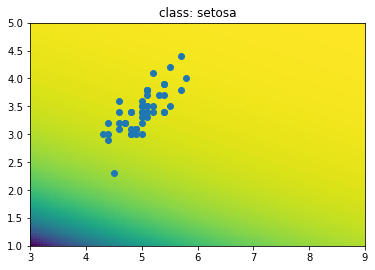

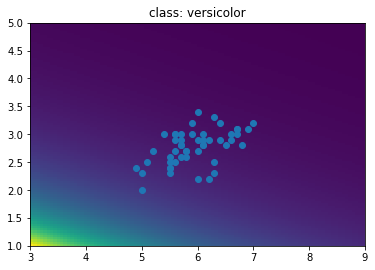

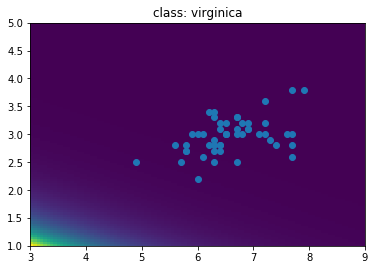

In [126]:
x = np.linspace(3.5, 8, 100)
y = np.linspace(1.5, 5, 100)
xs, ys = np.meshgrid(x, y)

Xt = np.vstack((xs.flat, ys.flat)).T
Xt = np.hstack((Xt, np.random.rand(*Xt.shape) * 0.001)) # fill random noise for other columns
classes, Y = clsf.use(Xt)

for k in range(3):
    zs = Y[:, k].reshape(xs.shape)

    plt.figure(figsize=(6,6))
    plt.imshow(zs, origin='lower', extent=(3,9,1,5))
    #plt.contourf(xs, ys, zs.reshape(xs.shape), alpha=0.3)
    plt.title("class: " + data.target_names[k])
    
    plt.scatter(data.data[data.target==k, 0], data.data[data.target==k, 1], marker='o')
